LOGISTIC REGRESSION

1. Data Exploration:


a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.


In [23]:
import pandas as pd

train_df = pd.read_excel("Titanic_train.csv.xlsx")
test_df = pd.read_excel("Titanic_test.csv.xlsx")

# Basic info
train_df.info()
train_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.0,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082.0,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Numerical features: Age, Fare, SibSp, Parch
- Categorical features: Sex, Embarked, Pclass
- Target: Survived (binary: 0 = not survived, 1 = survived)


c. visualizations

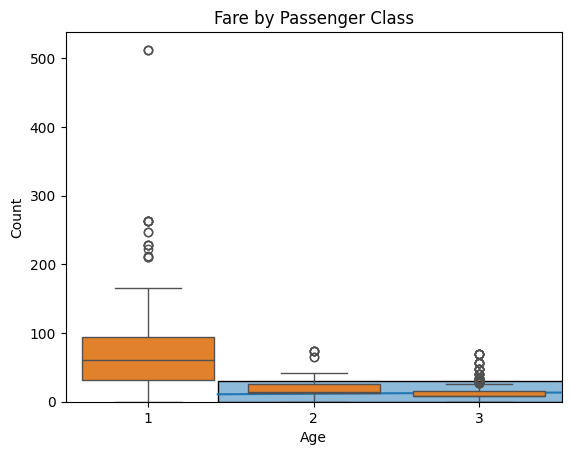

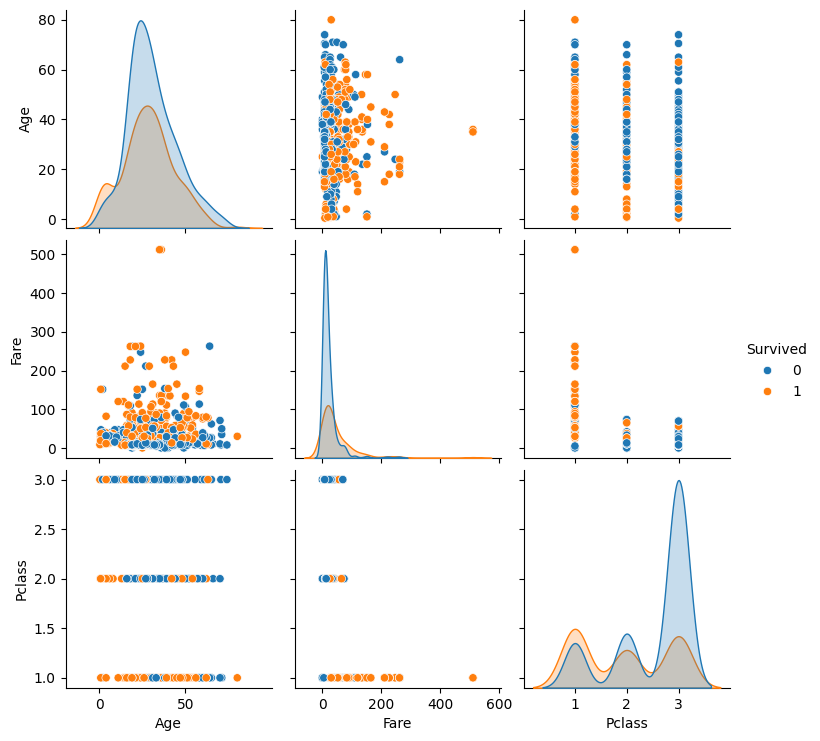

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")

# Boxplot of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title("Fare by Passenger Class")

# Pairplot of selected features
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived')


- Histograms: Show skewed distributions (e.g., Fare is right-skewed).
- Box plots: Reveal outliers in Fare and Age.
- Pair plots: Show relationships—e.g., survival is higher for females and first-class passengers.


2.Data Preprocessing

a.Handling Missing Values

In [25]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-2187606118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-2187606118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

- Age imputed with median to preserve distribution.
- Embarked rows with missing values dropped.


b.Encode Categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

- Age imputed with median to preserve distribution.
- Embarked rows with missing values dropped.


3.Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

4.Model Evaluation

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8824967824967825


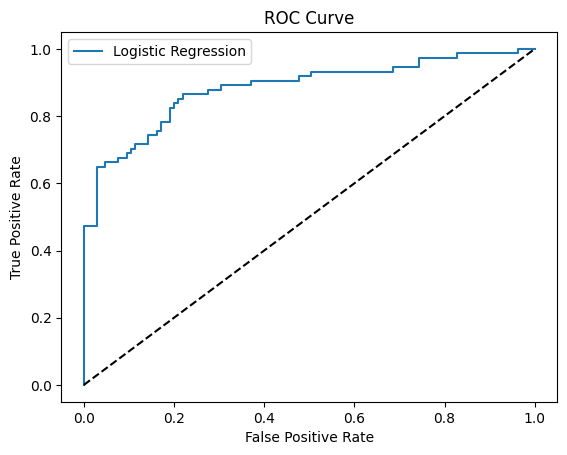

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

- Visualizes trade-off between true positive rate and false positive rate.
- AUC closer to 1 indicates strong classification performance.




5.Interpretation

In [29]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,Fare,0.002585
2,Age,-0.030484
5,Parch,-0.108146
6,Embarked_Q,-0.112074
4,SibSp,-0.294401
7,Embarked_S,-0.399835
0,Pclass,-0.937297
1,Sex,-2.591383


The model shows that being male and traveling in a lower class (Pclass) significantly reduce survival odds. Sex has the strongest negative impact, followed by Pclass. Smaller negative effects are seen for Embarked_S, SibSp, Parch, and Age, suggesting these factors slightly lower survival chances. Fare has a small positive effect, meaning higher-paying passengers had slightly better odds. Overall, gender and class are the most influential predictors.




6. Deployment with Streamlit

Create a file with app.py

In [30]:
!pip install streamlit

In [36]:
import pickle

# Assume you have trained a model called 'model' and your features are in 'X'
with open("model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "columns": X.columns.tolist()
    }, f)

/content


In [34]:
import os

print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir())

Current directory: /content
Files in current directory: ['.config', 'Titanic_train.csv.xlsx', 'Titanic_test.csv.xlsx', 'model.pkl', 'sample_data']


link of the app


https://logistic-regression-msga7qpnmtlcmwynmgw7va.streamlit.app/

 Interview Questions

Q1: What is the difference between precision and recall?
- Precision: Of all predicted positives, how many were correct?
- Recall: Of all actual positives, how many were identified?

Q2: What is cross-validation and why is it important?
- Cross-validation splits data into multiple folds to train and validate the model on different subsets.
- It helps assess model generalization and reduces overfitting.

